In [350]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# LSTM Model applied on 2nd Dataset

In [351]:
data = pd.read_csv(r'C:\Users\hp\Downloads\APDS\Econometrics with R\temperature_csv\RX_CACA5_Merged -Temp.csv')
data.head()

,time,drivingEndBearingTemp-I,drivingEndBearingTemp-II,nonDrivingEndBearingTemp-I,nonDrivingEndBearingTemp-II
0,10:47:56,35.9,36.2,35.7,34.1
1,10:48:57,36.5,36.9,36.2,34.6
2,10:49:58,37.2,37.5,36.6,35.0
3,10:50:58,37.8,38.2,37.0,35.4
4,10:51:58,38.5,38.8,37.3,35.7


In [352]:
#data = data.replace(0, np.NaN).ffill()

In [353]:
lstm_data = data.copy()

In [354]:
#lstm_data
    
# Drop profile_id column
#lstm_data = lstm_data.drop('profile_id', axis=1)

In [355]:
# Split df into X and y
data = lstm_data[['time', 'nonDrivingEndBearingTemp-I', 'nonDrivingEndBearingTemp-II']]
data

,time,nonDrivingEndBearingTemp-I,nonDrivingEndBearingTemp-II
0,10:47:56,35.7,34.1
1,10:48:57,36.2,34.6
2,10:49:58,36.6,35.0
3,10:50:58,37.0,35.4
4,10:51:58,37.3,35.7
...,...,...,...
176,13:46:07,59.7,58.3
177,13:47:08,59.7,58.1
178,13:48:09,59.5,57.9
179,13:49:09,59.3,57.7


In [356]:
#df['temp'] = data[['drivingEndBearingTemp-I', 'drivingEndBearingTemp-II','nonDrivingEndBearingTemp-I', 'nonDrivingEndBearingTemp-II'].mean(axis=1)

data['temp'] = data['nonDrivingEndBearingTemp-I'] + data['nonDrivingEndBearingTemp-II'] 
#data['temp'] = d['temp']/4
data['temp'] = data['temp'].div(2).round(2)

data = data.drop(['nonDrivingEndBearingTemp-I', 'nonDrivingEndBearingTemp-II'], axis=1)
#data = data.drop('time', axis=1)
data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_6656\908091440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temp'] = data['nonDrivingEndBearingTemp-I'] + data['nonDrivingEndBearingTemp-II']
C:\Users\hp\AppData\Local\Temp\ipykernel_6656\908091440.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temp'] = data['temp'].div(2).round(2)


,time,temp
0,10:47:56,34.9
1,10:48:57,35.4
2,10:49:58,35.8
3,10:50:58,36.2
4,10:51:58,36.5


In [357]:
data.index = pd.to_datetime(data["time"], format='%H:%M:%S')
data = data.drop('time', axis=1)

In [358]:
data.shape

(181, 1)

In [359]:
data.head()

,temp
time,
1900-01-01 10:47:56,34.9
1900-01-01 10:48:57,35.4
1900-01-01 10:49:58,35.8
1900-01-01 10:50:58,36.2
1900-01-01 10:51:58,36.5


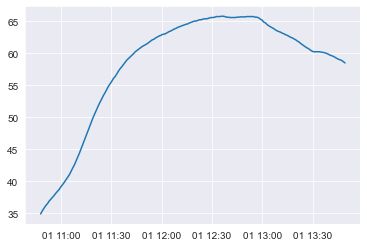

In [360]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['temp'])

In [361]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [362]:
time_step = 5
a,b = df_to_X_y(data, time_step)
X2 = a.reshape(176,5,1)
y2 = b.reshape(176)
X2.shape, y2.shape

((176, 5, 1), (176,))

In [363]:
X2

array([[[34.9 ],
        [35.4 ],
        [35.8 ],
        [36.2 ],
        [36.5 ]],

       [[35.4 ],
        [35.8 ],
        [36.2 ],
        [36.5 ],
        [36.9 ]],

       [[35.8 ],
        [36.2 ],
        [36.5 ],
        [36.9 ],
        [37.2 ]],

       [[36.2 ],
        [36.5 ],
        [36.9 ],
        [37.2 ],
        [37.5 ]],

       [[36.5 ],
        [36.9 ],
        [37.2 ],
        [37.5 ],
        [37.8 ]],

       [[36.9 ],
        [37.2 ],
        [37.5 ],
        [37.8 ],
        [38.15]],

       [[37.2 ],
        [37.5 ],
        [37.8 ],
        [38.15],
        [38.45]],

       [[37.5 ],
        [37.8 ],
        [38.15],
        [38.45],
        [38.75]],

       [[37.8 ],
        [38.15],
        [38.45],
        [38.75],
        [39.15]],

       [[38.15],
        [38.45],
        [38.75],
        [39.15],
        [39.5 ]],

       [[38.45],
        [38.75],
        [39.15],
        [39.5 ],
        [39.85]],

       [[38.75],
        [39.15],
        [

In [364]:
y2

array([36.9 , 37.2 , 37.5 , 37.8 , 38.15, 38.45, 38.75, 39.15, 39.5 ,
       39.85, 40.25, 40.65, 41.05, 41.55, 42.1 , 42.6 , 43.2 , 43.8 ,
       44.45, 45.15, 45.85, 46.55, 47.2 , 47.95, 48.6 , 49.3 , 49.95,
       50.55, 51.2 , 51.75, 52.3 , 52.8 , 53.35, 53.8 , 54.3 , 54.8 ,
       55.2 , 55.6 , 56.05, 56.35, 56.75, 57.2 , 57.6 , 57.9 , 58.25,
       58.6 , 58.95, 59.2 , 59.45, 59.7 , 59.95, 60.25, 60.45, 60.65,
       60.85, 61.05, 61.2 , 61.35, 61.5 , 61.7 , 61.9 , 62.1 , 62.2 ,
       62.4 , 62.55, 62.7 , 62.8 , 62.95, 63.  , 63.1 , 63.25, 63.4 ,
       63.5 , 63.65, 63.8 , 63.9 , 64.05, 64.15, 64.25, 64.35, 64.45,
       64.55, 64.6 , 64.75, 64.85, 64.95, 65.05, 65.05, 65.15, 65.25,
       65.25, 65.35, 65.4 , 65.4 , 65.45, 65.55, 65.6 , 65.6 , 65.65,
       65.75, 65.75, 65.75, 65.8 , 65.8 , 65.75, 65.65, 65.65, 65.6 ,
       65.6 , 65.6 , 65.6 , 65.65, 65.65, 65.7 , 65.7 , 65.7 , 65.7 ,
       65.75, 65.75, 65.75, 65.75, 65.75, 65.65, 65.65, 65.55, 65.35,
       65.2 , 64.9 ,

In [365]:
X_train2, y_train2 = X2[:100], y2[:100]
X_val2, y_val2 = X2[100:120], y2[100:120]
X_test2, y_test2 = X2[120:], y2[120:]
#X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape

In [366]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 64)                16896     
                                                                 
 dense_22 (Dense)            (None, 8)                 520       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [367]:
cp1 = ModelCheckpoint('model1', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.02), metrics=[RootMeanSquaredError()])

In [368]:
model1.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=100, callbacks=[cp1])

Epoch 1/100
1/4 [======>.......................] - ETA: 18s - loss: 3013.8982 - root_mean_squared_error: 54.8990

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 35s 10s/step - loss: 2995.7771 - root_mean_squared_error: 54.7337 - val_loss: 3384.9023 - val_root_mean_squared_error: 58.1799
Epoch 2/100
1/4 [======>.......................] - ETA: 0s - loss: 2368.4402 - root_mean_squared_error: 48.6666

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 19s 6s/step - loss: 2074.6616 - root_mean_squared_error: 45.5485 - val_loss: 2084.4922 - val_root_mean_squared_error: 45.6562
Epoch 3/100
1/4 [======>.......................] - ETA: 0s - loss: 1425.6685 - root_mean_squared_error: 37.7580

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 21s 7s/step - loss: 1182.6040 - root_mean_squared_error: 34.3890 - val_loss: 1208.7654 - val_root_mean_squared_error: 34.7673
Epoch 4/100
1/4 [======>.......................] - ETA: 0s - loss: 843.9321 - root_mean_squared_error: 29.0505

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 22s 7s/step - loss: 577.2422 - root_mean_squared_error: 24.0259 - val_loss: 503.1775 - val_root_mean_squared_error: 22.4316
Epoch 5/100
1/4 [======>.......................] - ETA: 0s - loss: 228.4324 - root_mean_squared_error: 15.1140

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 21s 7s/step - loss: 177.3902 - root_mean_squared_error: 13.3188 - val_loss: 103.6985 - val_root_mean_squared_error: 10.1832
Epoch 6/100
1/4 [======>.......................] - ETA: 0s - loss: 79.0636 - root_mean_squared_error: 8.8918

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 21s 7s/step - loss: 97.1923 - root_mean_squared_error: 9.8586 - val_loss: 1.5685 - val_root_mean_squared_error: 1.2524
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: 176.5014 - root_mean_squared_error: 13.2854 - val_loss: 1.6104 - val_root_mean_squared_error: 1.2690
Epoch 8/100
1/4 [======>.......................] - ETA: 0s - loss: 153.6127 - root_mean_squared_error: 12.3941

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 21s 7s/step - loss: 198.6956 - root_mean_squared_error: 14.0959 - val_loss: 1.1323 - val_root_mean_squared_error: 1.0641
Epoch 9/100
4/4 [==============================] - 0s 18ms/step - loss: 142.3381 - root_mean_squared_error: 11.9306 - val_loss: 32.4706 - val_root_mean_squared_error: 5.6983
Epoch 10/100
4/4 [==============================] - 0s 18ms/step - loss: 96.2727 - root_mean_squared_error: 9.8119 - val_loss: 113.8095 - val_root_mean_squared_error: 10.6682
Epoch 11/100
4/4 [==============================] - 0s 19ms/step - loss: 89.5312 - root_mean_squared_error: 9.4621 - val_loss: 180.7160 - val_root_mean_squared_error: 13.4431
Epoch 12/100
4/4 [==============================] - 0s 18ms/step - loss: 101.7617 - root_mean_squared_error: 10.0877 - val_loss: 185.2170 - val_root_mean_squared_error: 13.6094
Epoch 13/100
4/4 [==============================] - 0s 18ms/step - loss: 98.6597 - root_mean_squared_error: 9.9328 - val_loss: 140.6654 - v

4/4 [==============================] - 0s 18ms/step - loss: 87.3852 - root_mean_squared_error: 9.3480 - val_loss: 74.7409 - val_root_mean_squared_error: 8.6453
Epoch 56/100
4/4 [==============================] - 0s 18ms/step - loss: 87.5348 - root_mean_squared_error: 9.3560 - val_loss: 88.7086 - val_root_mean_squared_error: 9.4185
Epoch 57/100
4/4 [==============================] - 0s 18ms/step - loss: 86.7977 - root_mean_squared_error: 9.3165 - val_loss: 86.8960 - val_root_mean_squared_error: 9.3218
Epoch 58/100
4/4 [==============================] - 0s 17ms/step - loss: 86.1999 - root_mean_squared_error: 9.2844 - val_loss: 94.5758 - val_root_mean_squared_error: 9.7250
Epoch 59/100
4/4 [==============================] - 0s 16ms/step - loss: 86.1538 - root_mean_squared_error: 9.2819 - val_loss: 98.6690 - val_root_mean_squared_error: 9.9332
Epoch 60/100
4/4 [==============================] - 0s 17ms/step - loss: 86.6097 - root_mean_squared_error: 9.3064 - val_loss: 102.3799 - val_root_m

In [369]:
cp1 = ModelCheckpoint('model1', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.015), metrics=[RootMeanSquaredError()])
model1.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=40, callbacks=[cp1])

Epoch 1/40
1/4 [======>.......................] - ETA: 18s - loss: 84.3904 - root_mean_squared_error: 9.1864

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 22s 5s/step - loss: 86.9930 - root_mean_squared_error: 9.3270 - val_loss: 137.1424 - val_root_mean_squared_error: 11.7108
Epoch 2/40
1/4 [======>.......................] - ETA: 0s - loss: 94.3714 - root_mean_squared_error: 9.7145

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 14s 5s/step - loss: 90.3851 - root_mean_squared_error: 9.5071 - val_loss: 65.3457 - val_root_mean_squared_error: 8.0837
Epoch 3/40
4/4 [==============================] - 0s 19ms/step - loss: 91.3322 - root_mean_squared_error: 9.5568 - val_loss: 68.0087 - val_root_mean_squared_error: 8.2467
Epoch 4/40
4/4 [==============================] - 0s 17ms/step - loss: 87.2680 - root_mean_squared_error: 9.3417 - val_loss: 124.4143 - val_root_mean_squared_error: 11.1541
Epoch 5/40
4/4 [==============================] - 0s 20ms/step - loss: 85.4290 - root_mean_squared_error: 9.2428 - val_loss: 94.1651 - val_root_mean_squared_error: 9.7039
Epoch 6/40
4/4 [==============================] - 0s 18ms/step - loss: 85.0129 - root_mean_squared_error: 9.2202 - val_loss: 103.3780 - val_root_mean_squared_error: 10.1675
Epoch 7/40
4/4 [==============================] - 0s 19ms/step - loss: 78.1481 - root_mean_squared_error: 8.8401 - val_loss: 87.3671 - val_root_mean_squa

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 14s 5s/step - loss: 68.7677 - root_mean_squared_error: 8.2926 - val_loss: 48.9204 - val_root_mean_squared_error: 6.9943
Epoch 9/40
1/4 [======>.......................] - ETA: 0s - loss: 65.3041 - root_mean_squared_error: 8.0811

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 16s 5s/step - loss: 55.7025 - root_mean_squared_error: 7.4634 - val_loss: 30.8868 - val_root_mean_squared_error: 5.5576
Epoch 10/40
4/4 [==============================] - 0s 20ms/step - loss: 44.3908 - root_mean_squared_error: 6.6626 - val_loss: 40.3806 - val_root_mean_squared_error: 6.3546
Epoch 11/40
1/4 [======>.......................] - ETA: 0s - loss: 25.6160 - root_mean_squared_error: 5.0612

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 17s 6s/step - loss: 30.3579 - root_mean_squared_error: 5.5098 - val_loss: 7.2434 - val_root_mean_squared_error: 2.6914
Epoch 12/40
4/4 [==============================] - 0s 23ms/step - loss: 33.3375 - root_mean_squared_error: 5.7739 - val_loss: 40.3294 - val_root_mean_squared_error: 6.3505
Epoch 13/40
4/4 [==============================] - 0s 22ms/step - loss: 14.1101 - root_mean_squared_error: 3.7563 - val_loss: 7.3547 - val_root_mean_squared_error: 2.7120
Epoch 14/40
4/4 [==============================] - 0s 22ms/step - loss: 13.9724 - root_mean_squared_error: 3.7380 - val_loss: 19.2938 - val_root_mean_squared_error: 4.3925
Epoch 15/40
1/4 [======>.......................] - ETA: 0s - loss: 5.9749 - root_mean_squared_error: 2.4444

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 14s 5s/step - loss: 5.3636 - root_mean_squared_error: 2.3159 - val_loss: 1.1800 - val_root_mean_squared_error: 1.0863
Epoch 16/40
1/4 [======>.......................] - ETA: 0s - loss: 1.5766 - root_mean_squared_error: 1.2556

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 14s 5s/step - loss: 1.8083 - root_mean_squared_error: 1.3447 - val_loss: 0.0801 - val_root_mean_squared_error: 0.2830
Epoch 17/40
4/4 [==============================] - 0s 22ms/step - loss: 2.2104 - root_mean_squared_error: 1.4867 - val_loss: 2.7735 - val_root_mean_squared_error: 1.6654
Epoch 18/40
4/4 [==============================] - 0s 22ms/step - loss: 2.0912 - root_mean_squared_error: 1.4461 - val_loss: 0.0889 - val_root_mean_squared_error: 0.2981
Epoch 19/40
4/4 [==============================] - 0s 19ms/step - loss: 1.6075 - root_mean_squared_error: 1.2679 - val_loss: 3.3186 - val_root_mean_squared_error: 1.8217
Epoch 20/40
4/4 [==============================] - 0s 18ms/step - loss: 1.3874 - root_mean_squared_error: 1.1779 - val_loss: 3.6037 - val_root_mean_squared_error: 1.8983
Epoch 21/40
4/4 [==============================] - 0s 20ms/step - loss: 0.8872 - root_mean_squared_error: 0.9419 - val_loss: 1.2645 - val_root_mean_squared_error: 

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 15s 5s/step - loss: 0.4866 - root_mean_squared_error: 0.6976 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1030
Epoch 23/40
4/4 [==============================] - 0s 21ms/step - loss: 0.4749 - root_mean_squared_error: 0.6891 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1528
Epoch 24/40
1/4 [======>.......................] - ETA: 0s - loss: 0.3057 - root_mean_squared_error: 0.5529

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 16s 5s/step - loss: 0.2819 - root_mean_squared_error: 0.5310 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0627
Epoch 25/40
4/4 [==============================] - 0s 22ms/step - loss: 0.2394 - root_mean_squared_error: 0.4893 - val_loss: 1.2842 - val_root_mean_squared_error: 1.1332
Epoch 26/40
4/4 [==============================] - 0s 19ms/step - loss: 0.3238 - root_mean_squared_error: 0.5691 - val_loss: 0.3259 - val_root_mean_squared_error: 0.5709
Epoch 27/40
4/4 [==============================] - 0s 19ms/step - loss: 0.2014 - root_mean_squared_error: 0.4488 - val_loss: 0.3979 - val_root_mean_squared_error: 0.6308
Epoch 28/40
1/4 [======>.......................] - ETA: 0s - loss: 0.2042 - root_mean_squared_error: 0.4518

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 19s 6s/step - loss: 0.1977 - root_mean_squared_error: 0.4446 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0511
Epoch 29/40
4/4 [==============================] - 0s 46ms/step - loss: 0.1139 - root_mean_squared_error: 0.3374 - val_loss: 0.0846 - val_root_mean_squared_error: 0.2908
Epoch 30/40
4/4 [==============================] - 0s 33ms/step - loss: 0.0758 - root_mean_squared_error: 0.2754 - val_loss: 0.0583 - val_root_mean_squared_error: 0.2414
Epoch 31/40
4/4 [==============================] - 0s 29ms/step - loss: 0.0373 - root_mean_squared_error: 0.1932 - val_loss: 0.1544 - val_root_mean_squared_error: 0.3929
Epoch 32/40
4/4 [==============================] - 0s 24ms/step - loss: 0.0549 - root_mean_squared_error: 0.2343 - val_loss: 0.0239 - val_root_mean_squared_error: 0.1546
Epoch 33/40
4/4 [==============================] - 0s 23ms/step - loss: 0.0337 - root_mean_squared_error: 0.1836 - val_loss: 0.0097 - val_root_mean_squared_error: 

In [370]:
from tensorflow.keras.models import load_model
model1 = load_model('model1')

In [371]:
train_predictions2 = model1.predict(X_train2).flatten()
train_results2 = pd.DataFrame(data={'Train Predictions2':train_predictions2, 'Train Actuals2':y_train2})
train_results2

4/4 [==============================] - 1s 4ms/step


,Train Predictions2,Train Actuals2
0,36.665382,36.90
1,37.046883,37.20
2,37.377842,37.50
3,37.695709,37.80
4,38.018944,38.15
...,...,...
95,65.543343,65.55
96,65.576714,65.60
97,65.608147,65.60
98,65.628128,65.65


In [372]:
val_predictions2 = model1.predict(X_val2).flatten()
val_results2 = pd.DataFrame(data={'Val Predictions2':val_predictions2, 'Val Actuals2':y_val2})
val_results2

1/1 [==============================] - 0s 27ms/step


,Val Predictions2,Val Actuals2
0,65.682564,65.75
1,65.701157,65.75
2,65.714134,65.80
3,65.729645,65.80
4,65.736237,65.75
5,65.729721,65.65
6,65.700790,65.65
7,65.682671,65.60
8,65.657471,65.60
9,65.647614,65.60


In [373]:
test_predictions2 = model1.predict(X_test2).flatten()
test_results2 = pd.DataFrame(data={'Test Predictions2':test_predictions2, 'Actuals2':y_test2})
test_results2

2/2 [==============================] - 0s 0s/step


,Test Predictions2,Actuals2
0,65.716057,65.75
1,65.717682,65.75
2,65.717827,65.65
3,65.693565,65.65
4,65.680893,65.55
5,65.645103,65.35
6,65.579811,65.20
7,65.504662,64.90
8,65.381744,64.75
9,65.276344,64.50


In [374]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(test_predictions2, y_test2))

1.305699642510545

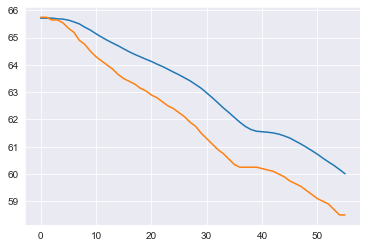

In [375]:
plt.plot(test_results2['Test Predictions2'][:])
plt.plot(test_results2['Actuals2'][:])

In [376]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

2/2 [==============================] - 0s 8ms/step


(    Predictions  Actuals
 0     65.716057    65.75
 1     65.717682    65.75
 2     65.717827    65.65
 3     65.693565    65.65
 4     65.680893    65.55
 5     65.645103    65.35
 6     65.579811    65.20
 7     65.504662    64.90
 8     65.381744    64.75
 9     65.276344    64.50
 10    65.144463    64.30
 11    65.022423    64.15
 12    64.908875    64.00
 13    64.802780    63.85
 14    64.703918    63.65
 15    64.591904    63.50
 16    64.483856    63.40
 17    64.386261    63.30
 18    64.300438    63.15
 19    64.211082    63.05
 20    64.130226    62.90
 21    64.031990    62.80
 22    63.945099    62.65
 23    63.843166    62.50
 24    63.738350    62.40
 25    63.639252    62.25
 26    63.528072    62.10
 27    63.417667    61.90
 28    63.282513    61.75
 29    63.147320    61.50
 30    62.973915    61.30
 31    62.802910    61.10
 32    62.615223    60.90
 33    62.426888    60.75
 34    62.256042    60.55
 35    62.075615    60.35
 36    61.898468    60.25
 37    61.74

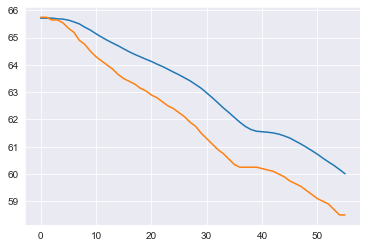

In [377]:
plot_predictions1(model1, X_test2, y_test2)

In [378]:
acc = model1.evaluate(X_test2, y_test2)

print(f'Accuracy of model is {acc}')

2/2 [==============================] - 2s 6ms/step - loss: 1.7049 - root_mean_squared_error: 1.3057
Accuracy of model is [1.7048512697219849, 1.3056995868682861]


In [385]:
[acc] = [100-(100*(test_predictions2-y_test2)/y_test2)]
acc
acc.mean()

98.02393783817271

In [380]:
test_results2

,Test Predictions2,Actuals2
0,65.716057,65.75
1,65.717682,65.75
2,65.717827,65.65
3,65.693565,65.65
4,65.680893,65.55
5,65.645103,65.35
6,65.579811,65.20
7,65.504662,64.90
8,65.381744,64.75
9,65.276344,64.50


In [381]:
#If predicted value is greater than 65 then motor is rejected

print("******************************************************")
if ((test_results2["Test Predictions2"]>65).any()):
    print("Keep Motor running, predicted value is greater than 65 degrees!!!")
else:
    print("Motor Validation Passed!!!")
print("******************************************************")

******************************************************
Keep Motor running, predicted value is greater than 65 degrees!!!
******************************************************
